# Inputs for the Farmer Module: Sarati sub basin

In [1]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
from PIL import Image

Please, specifiy the location of your downloaded Fuse folder

In [2]:
fuse_folder = 'C:/FUSE/CWATM'

output_folder = 'C:/CWatM_output_Taher_1July2020/'
photo_folder = 'C:/GitHub/FUSE/Images/'

## Introduction
The Sarati basin is a sub basin of the Upper Bhima basin. The Sarati basin is being used as a smaller scale example to use for developing and testing the models used in FUSE.

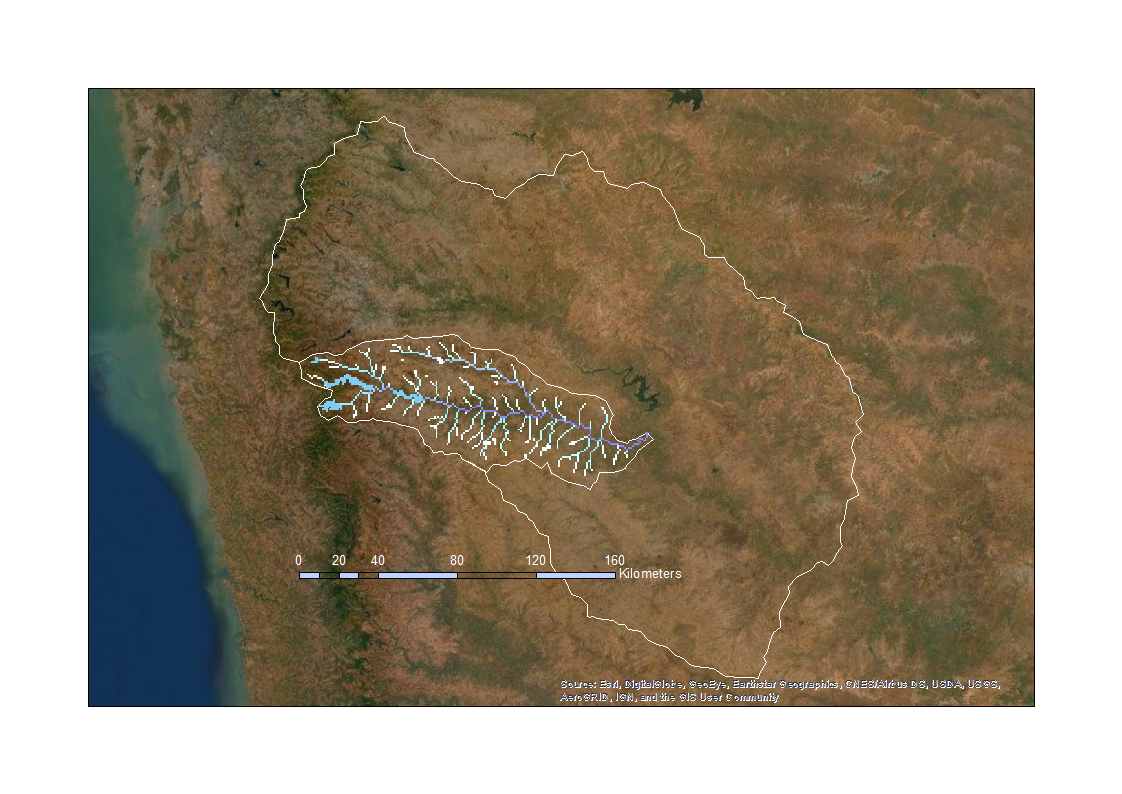

In [3]:
img = Image.open(photo_folder + 'Sarati_in_UB.tif')
img

We are currently interested in reference evapotranspiration and rainfall, averaged over the month and over each administrative unit.

The administrative units intersecting the Sarati basin are illustrated below.

## Segments: Talukas within the Sarati subbasin

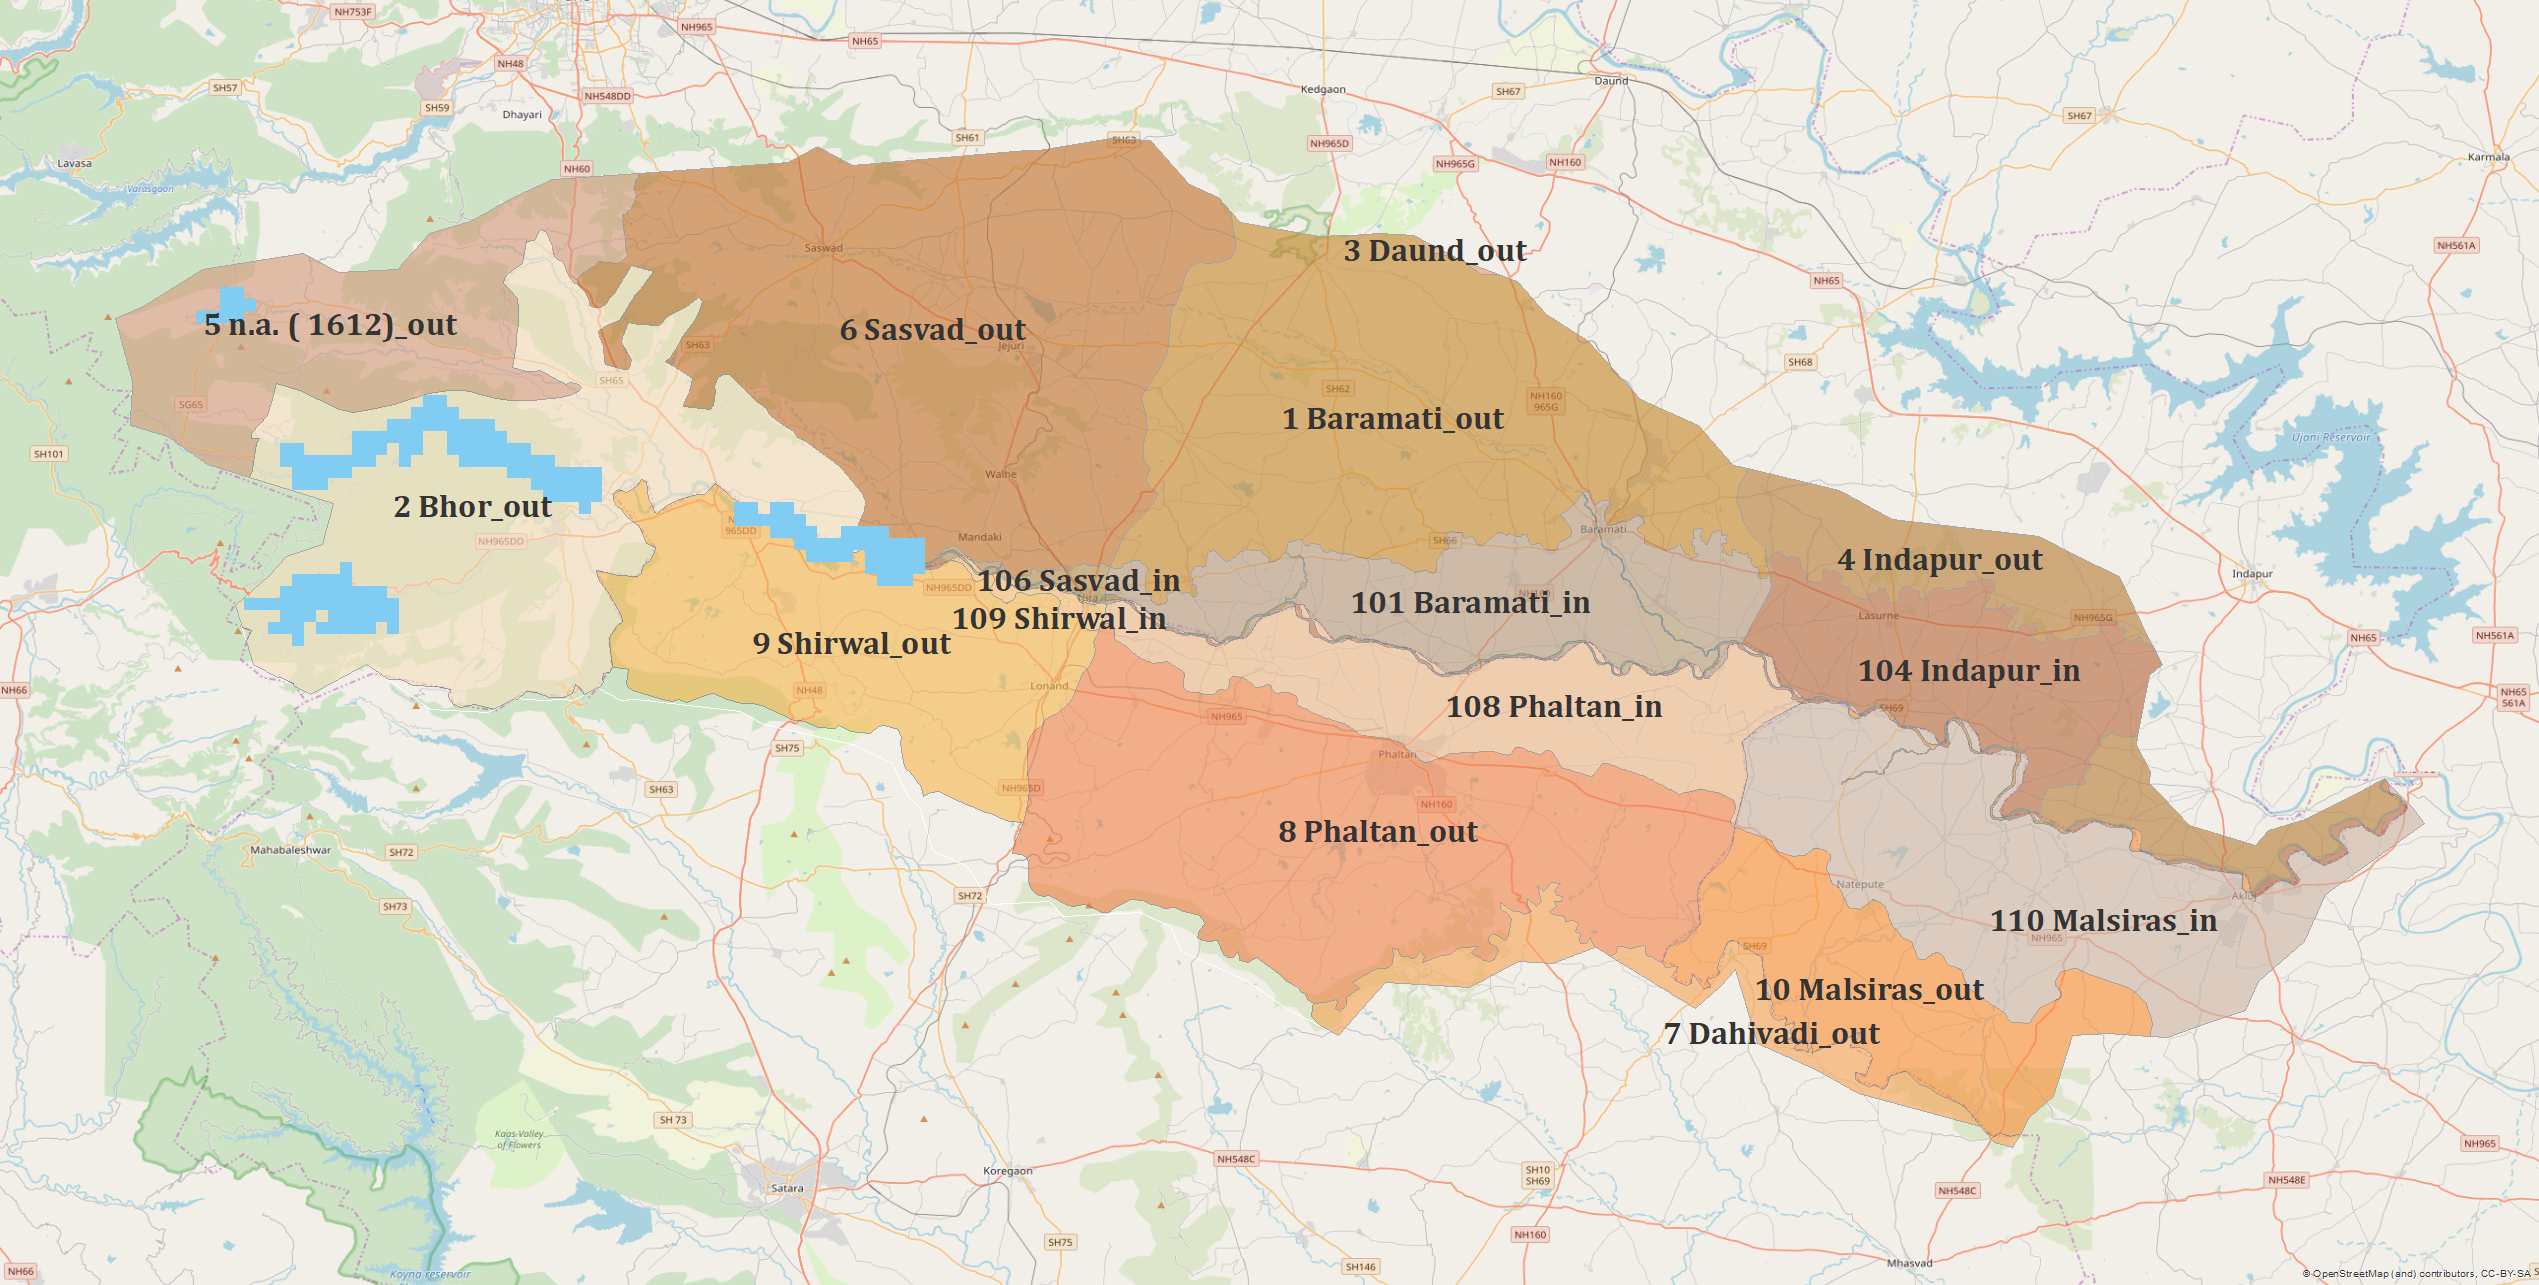

In [4]:
img = Image.open(photo_folder+'admin_segments_Sarati.tif')
img

In [5]:
#admin_segments_file = output_folder + "adminSegments_daily.nc"
admin_segments_file = output_folder + "adminSegments_totalend.nc"

nc_admin_segments = Dataset(admin_segments_file, 'r')

#admin_segments = nc_admin_segments.variables['adminSegments'][0,:,:]
admin_segments = nc_admin_segments.variables['adminSegments_totalend'][:,:]

The data above holds the monthly average value (ETRef, Rain, etc.) for each administrative unit in each cell of the administrative unit. 

The following code chooses a representative cell for each administrative unit.

In [6]:
Segment_reps = []

for i in range(nc_admin_segments.variables['lat'].shape[0]):
    for j in range (nc_admin_segments.variables['lon'].shape[0]):
        
        if admin_segments[i,j]>0 and admin_segments[i,j] not in [i[0] for i in Segment_reps]:       
            Segment_reps.append([int(admin_segments[i,j]), i, j])

Segment_reps.sort()

for i in Segment_reps:
    print('Segment ' +str(i[0])+ ', lat ' +str(i[1])+ ', lon ' +str(i[2]))

Segment 10100, lat 84, lon 258
Segment 10200, lat 81, lon 212
Segment 10214, lat 119, lon 187
Segment 10226, lat 103, lon 201
Segment 10240, lat 81, lon 213
Segment 10300, lat 30, lon 196
Segment 10400, lat 44, lon 128
Segment 10410, lat 46, lon 124
Segment 10426, lat 48, lon 124
Segment 10500, lat 47, lon 225
Segment 10600, lat 72, lon 181
Segment 10609, lat 87, lon 148
Segment 10614, lat 98, lon 160
Segment 10621, lat 123, lon 171
Segment 10626, lat 78, lon 147
Segment 10650, lat 86, lon 172
Segment 20700, lat 46, lon 212
Segment 20718, lat 67, lon 233
Segment 20729, lat 76, lon 224
Segment 20740, lat 82, lon 217
Segment 20800, lat 67, lon 250
Segment 30900, lat 299, lon 288
Segment 30923, lat 304, lon 263
Segment 31000, lat 244, lon 295
Segment 31023, lat 265, lon 295
Segment 31046, lat 243, lon 296
Segment 41100, lat 98, lon 285
Segment 41200, lat 131, lon 321
Segment 41300, lat 141, lon 333
Segment 41400, lat 113, lon 261
Segment 41403, lat 161, lon 284
Segment 41406, lat 163, lon

## Reference Evapotranspiration and Rainfall
Amounts are given in metres [m]

In [7]:
#ETRef_monAvg_segments_file = output_folder + "ETRef_segments_monthavg.nc"
#rain_monAvg_segments_file = output_folder + "rain_segments_monthavg.nc"
from netCDF4 import num2date

ETRef_monAvg_segments_file = output_folder + "ETRefAverage_segments_monthavg.nc"

rain_monAvg_segments_file = output_folder + "rainAverage_segments_monthtot.nc"



nc_ETRef_monAvg_segments = Dataset(ETRef_monAvg_segments_file, 'r')
nc_rain_monAvg_segments = Dataset(rain_monAvg_segments_file, 'r')
nc_head_monEnd_segments = Dataset(output_folder + "head_development_segments_monthend.nc")

Dates_simulation = num2date(nc_head_monEnd_segments.variables['time'][:], units=nc_head_monEnd_segments.variables['time'].units)

ETRef_monAvg_segments = nc_ETRef_monAvg_segments.variables['ETRefAverage_segments_monthavg'][:,:,:]
#rain_monAvg_segments = nc_rain_monAvg_segments.variables['rain_segments_monthavg'][:,:,:]
rain_monAvg_segments = nc_rain_monAvg_segments.variables['rainAverage_segments_monthtot'][:,:,:]
head_monEnd_segments = nc_head_monEnd_segments.variables['head_development_segments_monthend'][:,:,:]

In [8]:
ETRef_monAvg_representative = []
rain_monAvg_representative= []
head_monEnd_representative = []

for seg in Segment_reps:
    
    ETRef_monAvg_representative.append([seg[0]])
    rain_monAvg_representative.append([seg[0]])
    head_monEnd_representative.append([seg[0]])
    
    for t in range(nc_ETRef_monAvg_segments.variables['time'].shape[0]):
        ETRef_monAvg_representative[-1].append(ETRef_monAvg_segments[t, seg[1], seg[2]])
        rain_monAvg_representative[-1].append(rain_monAvg_segments[t, seg[1], seg[2]])
        head_monEnd_representative[-1].append(head_monEnd_segments[t, seg[1], seg[2]])

### Evapotranspiration

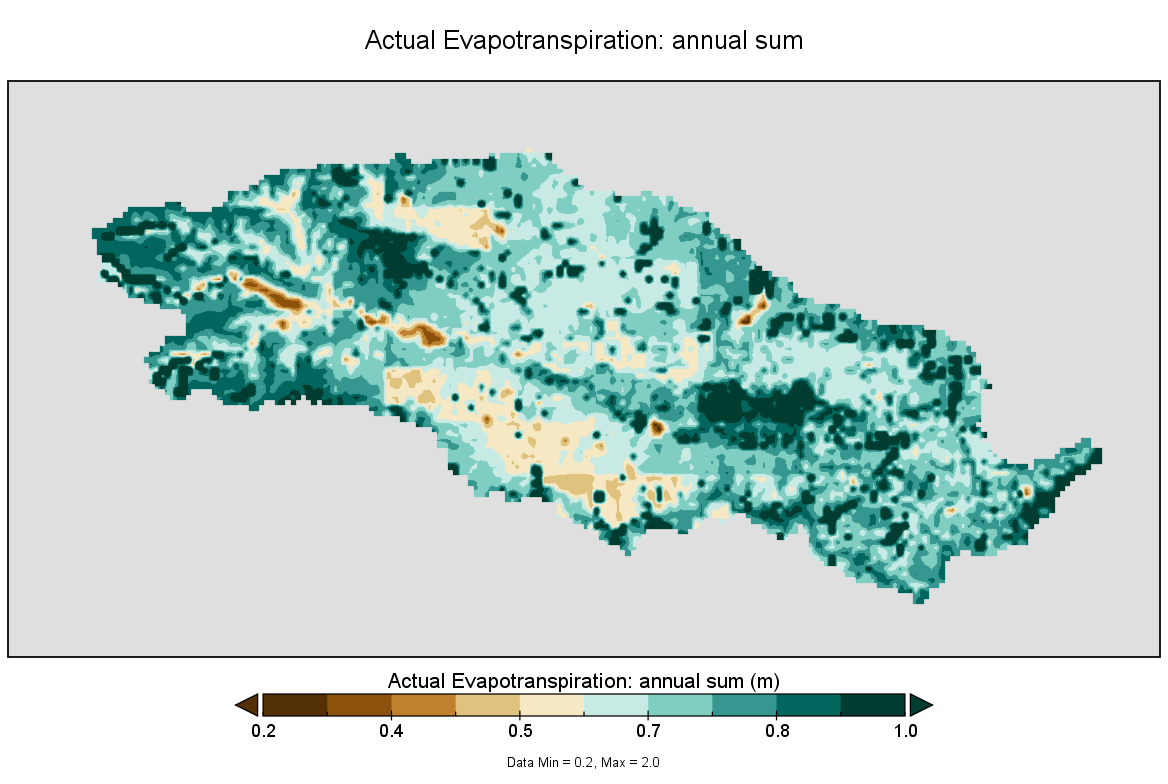

In [9]:
img = Image.open(photo_folder + 'sum_actualET_annualtot.png')    # Open image as PIL image object
img

In [10]:
fig = go.Figure()

for i in ETRef_monAvg_representative:
    fig.add_trace(go.Scatter(y=i[1:],
                             x=Dates_simulation,
                    mode='lines',
                    name=i[0]))


fig.update_layout(title='Reference Evapotranspiration',
                       xaxis_title='Month',
                       yaxis_title='Monthly Average Reference ET (m/day)')

fig.show()

The following output may allow for easier input into Excel.

In [11]:
file = open('ETRef.txt','w') 
for seg in ETRef_monAvg_representative:
    
    #print(*seg, sep = ", ")

    text=''
    for i in seg:
        if i<0:
            i=0
        text += str(i)+' '
        
    file.write(text+'\n')
    
file.close() 

In [12]:
file = open('GWDepth.txt','w') 
for seg in head_monEnd_representative:
    #print(*seg, sep = ", ")

    text=''
    for i in seg:
        if i<0:
            i=0
        text += str(i)+' '
        
    file.write(text+'\n')
    
file.close() 
"""
fig = go.Figure()
    
for i in head_monEnd_representative:
    fig.add_trace(go.Scatter(y=i[1:],
                             x=Dates_simulation,
                    mode='lines',
                    name=i[0]))


fig.update_layout(title='Groundwater depth',
                       xaxis_title='Month',
                       yaxis_title='Depth to GW (m)')

fig.show()
"""

"\nfig = go.Figure()\n    \nfor i in head_monEnd_representative:\n    fig.add_trace(go.Scatter(y=i[1:],\n                             x=Dates_simulation,\n                    mode='lines',\n                    name=i[0]))\n\n\nfig.update_layout(title='Groundwater depth',\n                       xaxis_title='Month',\n                       yaxis_title='Depth to GW (m)')\n\nfig.show()\n"

### Rainfall

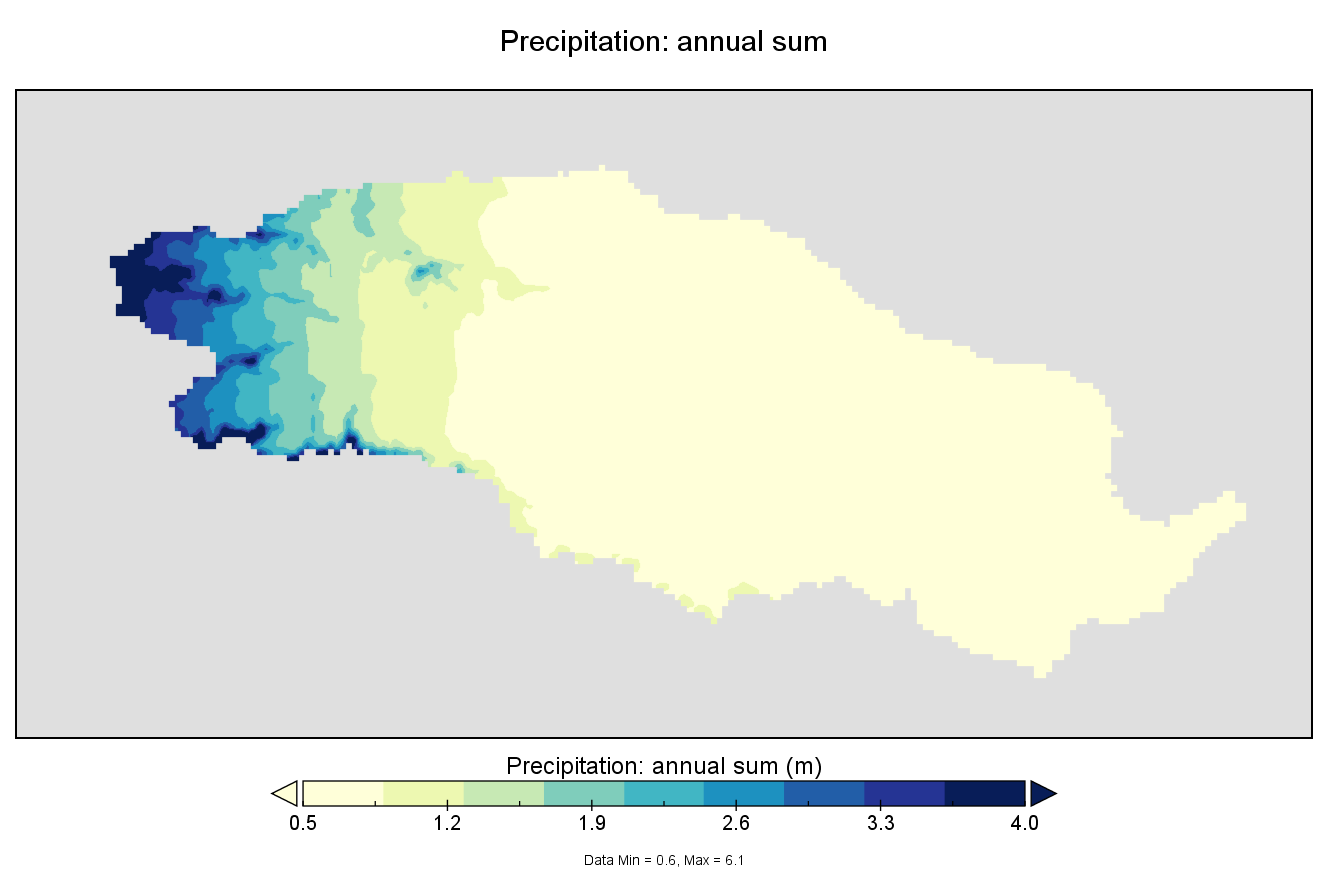

In [13]:
img = Image.open(photo_folder + 'sum_precipitation_annualtot.png')    # Open image as PIL image object
img


In [14]:
fig = go.Figure()
    
for i in rain_monAvg_representative:
    fig.add_trace(go.Scatter(y=i[1:],
                             x=Dates_simulation,
                    mode='lines',
                    name=i[0]))


fig.update_layout(title='Rainfall',
                       xaxis_title='Month',
                       yaxis_title='Monthly Total Rainfall, segment average (m/month)')

fig.show()

The following output may allow for easier input into Excel.

In [15]:
file = open('Rain.txt','w') 

for seg in rain_monAvg_representative:
    #print(*seg, sep = ", ")

    text=''
    for i in seg:
        if i<0:
            print(seg[0], i)
        text += str(i)+' '
        
    file.write(text+'\n')
    
file.close() 

## Cropland use
Areas are given in metres squared [m2]

In [16]:
len(Dates_simulation)

43

In [17]:
def crops_initialise(xl_settings_file_path):
    df = pd.read_excel(xl_settings_file_path, sheet_name='Crops')

    Crops = []
    Crops_names = []
    for i in df.index:
        crop = [df['Planting month'][i]]

        for gs in range(1, 5):
            gs_parameters = [df['EM' + str(gs)][i], df['KC' + str(gs)][i], df['KY' + str(gs)][i]]
            crop.append(gs_parameters)

        Crops.append(crop)
        Crops_names.append(df['Crop'][i])

    return Crops, Crops_names

In [18]:
import pandas as pd
import numpy as np

basepath = 'C:\GitHub\FUSE\CWatM_settings'
xl_settings_file_path = basepath + r'\cwatm_settings.xlsx'
Crops, Crops_names = crops_initialise(xl_settings_file_path)

df = {}

for c in range(0, len(Crops_names)):
    
    df[Crops_names[c]] = Dataset(output_folder + "areaCrops_Irr_segment["+str(c)+"]_monthend.nc", 'r')
    df[Crops_names[c]+'_segments'] = df[Crops_names[c]].variables['areaCrops_Irr_segment['+str(c)+']_monthend'][0,:,:]
    
    for i in range(1,len(Dates_simulation)):
            df[Crops_names[c]+'_segments'] = np.where(df[Crops_names[c]].variables['areaCrops_Irr_segment['+str(c)+']_monthend'][i,:,:]>df[Crops_names[c]+'_segments'], df[Crops_names[c]].variables['areaCrops_Irr_segment['+str(c)+']_monthend'][i,:,:], df[Crops_names[c]+'_segments'])

            
    df[Crops_names[c]+'_representative'] = []
    
    for seg in Segment_reps:
        df[Crops_names[c]+'_representative'].append([seg[0], df[Crops_names[c]+'_segments'][seg[1], seg[2]]])
    
    df[Crops_names[c]+'_final'] = np.array([i[1] for i in df[Crops_names[c]+'_representative']])
    
fig = go.Figure()
x=['s'+str(i[0]) for i in df[Crops_names[1]+'_representative']]

for c in range(0, len(Crops_names)):
        fig.add_trace(go.Bar(x = x, 
                             y = df[Crops_names[c]+'_final'],
                             name = Crops_names[c]))

fig.update_layout(title='Crop areas',
                  xaxis_title='Segment',
                  yaxis_title='Area (m2)', 
                  barmode='stack')

fig.show()   
    

## Crop-specific and segment-specific areas

The following output may allow for easier input into Excel.

In [19]:
file = open('Crops.txt','w') 

x=['s'+str(i[0]) for i in df[Crops_names[1]+'_representative']]

for i in range(len(x)):
    
    text = x[i]+', '
    for c in range(0, len(Crops_names)):
        y = df[Crops_names[c]+'_final'][i],
        if c<len(Crops_names)-1:
            text += str(y[0])+', '
        else:
            text += str(y[0])
    print(text)
    file.write(text+'\n')

file.close() 
    

        

s10100, 5766227.0, 8686928.0, 8038303.0, 12755008.0, 22336740.0, 9691688.0, 8942279.0, 7795486.0
s10200, 3893995.5, 5370997.5, 4877589.5, 7731870.5, 6602662.5, 6587649.0, 4045068.8, 4653510.5
s10214, 443292.47, 1326750.2, 3182047.5, 2465657.2, 17293204.0, 588536.8, 2816238.8, 948587.94
s10226, 1672435.1, 3432270.5, 5213266.5, 5526768.5, 29310754.0, 2583974.2, 6257735.0, 3050205.8
s10240, 630295.06, 768906.06, 902837.44, 1053202.2, 3381076.0, 755119.25, 1063624.9, 649506.7
s10300, 8498657.0, 13575167.0, 14335475.0, 20220426.0, 46533430.0, 14498357.0, 15828811.0, 12051927.0
s10400, 5580565.5, 8659399.0, 11303060.0, 13574011.0, 34480464.0, 9571293.0, 11223271.0, 9587004.0
s10410, 12902.618, 42269.742, 82748.52, 68450.9, 376201.25, 21379.826, 95062.53, 24500.645
s10426, 647508.06, 3297766.2, 8456196.0, 6306139.0, 74495336.0, 956306.5, 12677674.0, 1516499.4
s10500, 698148.25, 1002710.7, 1334172.8, 1616085.5, 1744093.1, 1274296.4, 724166.8, 1277142.0
s10600, 4324557.0, 6478034.0, 4983069.0, 

In [20]:
for i in range(len(Segment_reps)):
    print(str(sugarAdsali_representative[i][0]) + ', '+ str(sugarAdsali_representative[i][1]) + ', ' + str(sugarPreSeasonal_representative[i][1]) + ', ' + str(sugarSuru_representative[i][1]) + ', ' + str(sorghum_representative[i][1]))

NameError: name 'sugarAdsali_representative' is not defined

## Crop-specific Water use 

In [ ]:
PETTotVol_sugarAdsali_segments_file = output_folder + "PET_Sugar1_segments_monthtot.nc"
PETTotVol_sugarPreSeasonal_segments_file = output_folder + "PET_Sugar2_segments_monthtot.nc"
PETTotVol_sugarSuru_segments_file = output_folder + "PET_Sugar3_segments_monthtot.nc"
PETTotVol_sorghum_segments_file = output_folder + "PET_Sorghum_segments_monthtot.nc"

nc_PETTotVol_sugarAdsali_segments = Dataset(PETTotVol_sugarAdsali_segments_file, 'r')
nc_PETTotVol_sugarPreSeasonal_segments = Dataset(PETTotVol_sugarPreSeasonal_segments_file, 'r')
nc_PETTotVol_sugarSuru_segments = Dataset(PETTotVol_sugarSuru_segments_file, 'r')
nc_PETTotVol_sorghum_segments = Dataset(PETTotVol_sorghum_segments_file, 'r')

PETTotVol_sugarAdsali_segments = nc_PETTotVol_sugarAdsali_segments.variables['PET_Sugar1_segments_monthtot'][:,:,:]
PETTotVol_sugarPreSeasonal_segments = nc_PETTotVol_sugarPreSeasonal_segments.variables['PET_Sugar2_segments_monthtot'][:,:,:]
PETTotVol_sugarSuru_segments = nc_PETTotVol_sugarSuru_segments.variables['PET_Sugar3_segments_monthtot'][:,:,:]
PETTotVol_sorghum_segments = nc_PETTotVol_sorghum_segments.variables['PET_Sorghum_segments_monthtot'][:,:,:]

PETTotVol_sugarAdsali_representative = []
PETTotVol_sugarPreSeasonal_representative = []
PETTotVol_sugarSuru_representative = []
PETTotVol_sorghum_representative = []

for seg in Segment_reps:
    
    PETTotVol_sugarAdsali_representative.append([seg[0]])
    PETTotVol_sugarPreSeasonal_representative.append([seg[0]])
    PETTotVol_sugarSuru_representative.append([seg[0]])
    PETTotVol_sorghum_representative.append([seg[0]])
    
    for t in range(nc_ETRef_monAvg_segments.variables['time'].shape[0]):
        
        PETTotVol_sugarAdsali_representative[-1].append(PETTotVol_sugarAdsali_segments[t, seg[1], seg[2]])
        PETTotVol_sugarPreSeasonal_representative[-1].append(PETTotVol_sugarPreSeasonal_segments[t, seg[1], seg[2]])
        PETTotVol_sugarSuru_representative[-1].append(PETTotVol_sugarSuru_segments[t, seg[1], seg[2]])
        PETTotVol_sorghum_representative[-1].append(PETTotVol_sorghum_segments[t, seg[1], seg[2]])
    


In [ ]:
Crop_name = ['Sugarcane, variety Adsali', 'Sugarcane, variety Pre-Seasonal', 'Sugarcane, variety Suru', 'Sorghum']

Crop = [PETTotVol_sugarAdsali_representative, PETTotVol_sugarPreSeasonal_representative, 
        PETTotVol_sugarSuru_representative, PETTotVol_sorghum_representative]

for c in range(len(Crop)):
    fig = go.Figure()
    """
    for i in PETTotVol_sugarAdsali_representative:
        fig.add_trace(go.Scatter(y=i[1:],
                        mode='lines',
                        name=i[0]))
    """
    for i in Crop[c]:
        fig.add_trace(go.Scatter(y=i[1:],
                        mode='lines',
                        name=i[0]))

    fig.update_layout(title='Monthly Total Potential ET: '+ Crop_name[c],
                       xaxis_title='Month',
                       yaxis_title='Potential ET (m3/month)')

    fig.show()

The following outputs may allow for easier input into Excel.

In [ ]:
for c in range(len(Crop)):
    print(Crop_name[c])
    for seg in Crop[c]:
        print(*seg, sep = ", ")
    print('\n')

In [ ]:
img = Image.open(photo_folder + 'relative_yield_sorghum.png')
img

## Reservoirs

## Groundwater

In [ ]:
img = Image.open(photo_folder + 'depth_to_groundwater.png')
img

In [ ]:
img = Image.open(photo_folder + 'depth_to_groundwater_leakage.png')
img